In [ ]:
"""
NRC Emotional Lexicon
Found overall highest scores are:
    - positive
    - trust
    - anticipation
    - joy
    - negative
    
Conclusion: doesn't seem too interesting

"""

In [11]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# !pip install NRCLex
from nrclex import NRCLex

%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/katiehuang/Desktop/metis/projects/onl_ds5_project_4/py')
from word_cloud import *
import importlib

## 1. Load data

In [10]:
# Let's read in our document-term matrix
speech_df = pd.read_pickle('../dump/speech_clean_lemma')
speech_df_raw = pd.read_pickle('../dump/speech_df')
data = pd.read_pickle('../dump/data_dtm_lemma.pkl')
tdm = data.transpose()

## 2. Examin NRC dictionary

Emotional affects:
* positive
* joy
* anticipation
* trust
* surprise


* negative
* fearr
* anger
* sadness
* disgust

In [2]:
filepath = '../resource/NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'
emolex_df = pd.read_csv(filepath, names=["word", "emotion", "association"], skiprows=45, sep='\t', keep_default_na=False)
emolex_df.head(12)

,word,emotion,association
0,abandonment,joy,0
1,abandonment,negative,1
2,abandonment,positive,0
3,abandonment,sadness,1
4,abandonment,surprise,1
5,abandonment,trust,0
6,abate,anger,0
7,abate,anticipation,0
8,abate,disgust,0
9,abate,fear,0


In [3]:
# Reshape (pivot)
emolex_words_pivot = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_words_pivot.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,abandonment,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0
1,abate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abatement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abba,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,abbot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Test with the first speech

In [6]:
#Instantiate text object (for best results, 'text' should be unicode).
text_object = NRCLex('text')

In [7]:
#Return words list.

text_object.words

['text']

In [8]:
#Return sentences list.

text_object.sentences

[Sentence("text")]

In [9]:
text_object.affect_list

[]

In [23]:
# Split the speech into 10 parts
transcript = speech_df_raw.transcript.iloc[0]
parts = split_text(transcript, n=10)
parts[0]

'  I wish someone had told me at my own commencement that the one and only requirement for graduation was ...that I had to emerge out of the closed, cordoned-off, space of my own head. This was the sole requirement that no one told me about. I had to learn to listen – to another mind; to nature; to history. “Generation L.” Before I begin, I want you to turn to your left, turn to your right. And congratulate the person next to you, even if you don’t know them. Congratulations to graduates of the class of 2018! Yes, yes, yes; I know what you are now thinking. “Last year, we had Will Ferrell.” He was funny, upbeat, quirky – a comic genius. How come we got stuck with the cancer guy?”. But hold that thought for a second, for here we are, on this absolutely glorious morning – and if there’s one thing that Mr. Ferrell and I do share, it’s this: We are both immensely, immensely honored to be asked to speak to you. And so let me congratulate you, and your families, on what is definitely one of 

#### Sample usage (on the first part of the first speech)

In [25]:
#Instantiate text object (for best results, 'text' should be unicode).

text_object = NRCLex(parts[0])

In [26]:
# text_object.affect_list

In [17]:
text_object.affect_dict

{'graduation': ['anticipation',
  'fear',
  'joy',
  'positive',
  'surprise',
  'trust'],
 'learn': ['positive'],
 'don': ['positive', 'trust'],
 'genius': ['positive'],
 'cancer': ['anger', 'disgust', 'fear', 'negative', 'sadness'],
 'thought': ['anticipation'],
 'share': ['anticipation', 'joy', 'positive', 'trust'],
 'memorable': ['joy', 'positive', 'surprise', 'trust'],
 'talk': ['positive'],
 'break': ['surprise'],
 'younger': ['positive'],
 'daughter': ['joy', 'positive'],
 'time': ['anticipation'],
 'pawn': ['negative', 'trust'],
 'knight': ['positive'],
 'rhythm': ['positive'],
 'clumsy': ['disgust', 'negative']}

In [18]:
text_object.raw_emotion_scores

{'anticipation': 4,
 'fear': 2,
 'joy': 4,
 'positive': 12,
 'surprise': 3,
 'trust': 6,
 'anger': 1,
 'disgust': 2,
 'negative': 4,
 'sadness': 1}

In [19]:
text_object.top_emotions

[('positive', 0.3076923076923077)]

In [30]:
# text_object.affect_frequencies
sorted(text_object.affect_frequencies.items(), key=lambda x:x[1], reverse=True)[:3]

[('positive', 0.3076923076923077),
 ('trust', 0.15384615384615385),
 ('negative', 0.10256410256410256)]

#### Sample usage (on the whole first speech)

In [46]:
transcript = speech_df_raw.transcript.iloc[0]
text_object = NRCLex(transcript)
text_object.raw_emotion_scores

{'anticipation': 44,
 'fear': 64,
 'joy': 42,
 'positive': 128,
 'surprise': 25,
 'trust': 69,
 'anger': 42,
 'disgust': 32,
 'negative': 94,
 'sadness': 51}

In [47]:
# Remove 'positive' and 'negative' from the emotions dictionary
# Since they're too abstract
emotions = text_object.affect_frequencies
emotions.pop('positive',None)
emotions.pop('negative',None)
emotions

{'fear': 0.10829103214890017,
 'anger': 0.07106598984771574,
 'anticip': 0.0,
 'trust': 0.116751269035533,
 'surprise': 0.04230118443316413,
 'sadness': 0.08629441624365482,
 'disgust': 0.05414551607445008,
 'joy': 0.07106598984771574,
 'anticipation': 0.07445008460236886}

In [48]:
sorted(emotions.items(), key=lambda x:x[1], reverse=True)[:5]

[('trust', 0.116751269035533),
 ('fear', 0.10829103214890017),
 ('sadness', 0.08629441624365482),
 ('anticipation', 0.07445008460236886),
 ('anger', 0.07106598984771574)]

In [55]:
transcript = speech_df_raw.transcript.iloc[1]
text_object = NRCLex(transcript)
text_object.raw_emotion_scores

{'disgust': 21,
 'negative': 79,
 'sadness': 43,
 'anticipation': 64,
 'fear': 51,
 'joy': 60,
 'positive': 124,
 'surprise': 27,
 'trust': 82,
 'anger': 35}

In [50]:
# Remove 'positive' and 'negative' from the emotions dictionary
# Since they're too abstract
emotions = text_object.affect_frequencies
emotions.pop('positive',None)
emotions.pop('negative',None)
emotions

{'fear': 0.08703071672354949,
 'anger': 0.059726962457337884,
 'anticip': 0.0,
 'trust': 0.13993174061433447,
 'surprise': 0.04607508532423208,
 'sadness': 0.07337883959044368,
 'disgust': 0.03583617747440273,
 'joy': 0.10238907849829351,
 'anticipation': 0.10921501706484642}

In [51]:
sorted(emotions.items(), key=lambda x:x[1], reverse=True)[:5]

[('trust', 0.13993174061433447),
 ('anticipation', 0.10921501706484642),
 ('joy', 0.10238907849829351),
 ('fear', 0.08703071672354949),
 ('sadness', 0.07337883959044368)]

In [56]:
emotion_score_list = []

for i in range(len(speech_df_raw)):
    transcript = speech_df_raw.transcript.iloc[i]
    text_object = NRCLex(transcript)
    emotion_score_list.append(text_object.raw_emotion_scores)

In [116]:
emotion_score_df = pd.DataFrame(emotion_score_list)
emotion_score_df.head()

,anticipation,fear,joy,positive,surprise,trust,anger,disgust,negative,sadness
0,44.0,64.0,42.0,128.0,25.0,69,42.0,32.0,94.0,51.0
1,64.0,51.0,60.0,124.0,27.0,82,35.0,21.0,79.0,43.0
2,53.0,19.0,44.0,98.0,18.0,63,9.0,8.0,27.0,22.0
3,72.0,38.0,62.0,163.0,35.0,119,32.0,20.0,64.0,31.0
4,94.0,32.0,73.0,203.0,33.0,94,26.0,17.0,70.0,39.0


In [117]:
# Normalize the score
emotion_score_df['total'] = emotion_score_df.sum(axis=1)
emotion_score_df= emotion_score_df.div(emotion_score_df['total'],axis=0)
emotion_score_df.loc['avg'] = emotion_score_df.mean(axis=0)
emotion_score_df

,anticipation,fear,joy,positive,surprise,trust,anger,disgust,negative,sadness,total
0,0.074450,0.108291,0.071066,0.216582,0.042301,0.116751,0.071066,0.054146,0.159052,0.086294,1.0
1,0.109215,0.087031,0.102389,0.211604,0.046075,0.139932,0.059727,0.035836,0.134812,0.073379,1.0
2,0.146814,0.052632,0.121884,0.271468,0.049861,0.174515,0.024931,0.022161,0.074792,0.060942,1.0
3,0.113208,0.059748,0.097484,0.256289,0.055031,0.187107,0.050314,0.031447,0.100629,0.048742,1.0
4,0.138032,0.046990,0.107195,0.298091,0.048458,0.138032,0.038179,0.024963,0.102790,0.057269,1.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.129222,0.061674,0.077827,0.293686,0.049927,0.157122,0.032305,0.030837,0.110132,0.057269,1.0
438,0.095599,0.080425,0.086495,0.257967,0.050076,0.151745,0.069803,0.037936,0.113809,0.056146,1.0
439,0.100045,0.054078,0.123479,0.255521,0.056782,0.165840,0.047769,0.027941,0.114015,0.054529,1.0
440,0.095628,0.068306,0.120219,0.232240,0.060109,0.142077,0.051913,0.051913,0.112022,0.065574,1.0


In [161]:
# Quick plot
# emotion_score_df.iloc[:,:-1].mean(axis=0).sort_values().plot.barh(sort_columns=False);

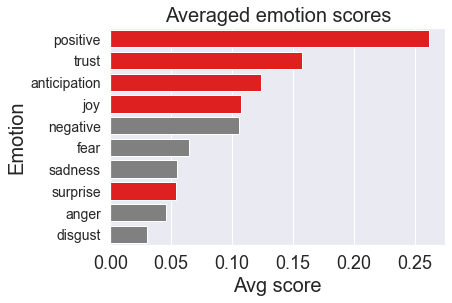

In [160]:
# Plot with sns

fig, ax = plt.subplots()
colors = ['red' if (y in ['positive','trust','joy','anticipation','surprise']) else 'grey'
          for y in emotion_score_df.iloc[:,:-1].mean(axis=0).sort_values(ascending=False).index]
sns.barplot(x=emotion_score_df.iloc[-1,:-1],y=emotion_score_df.columns[:-1],\
           order=emotion_score_df.iloc[:,:-1].mean(axis=0).sort_values(ascending=False).index,\
           palette = colors)

ax.set_title('Averaged emotion scores',fontsize=20)
ax.set_ylabel('Emotion',fontsize=20)
ax.set_xlabel('Avg score',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14);